# **Trustworthy Machine Learning - XAI homework**


---
Group number ***5***

Student name #1 ***Balint Mucsanyi***

Student name #2 ***Lennart Slusney***

Student name #3 ***Joschka Strüber***

**The deadline for this homework is on 12/12/2022 at 23:59.**

**Submission**: Please download your colab notebook as .ipynb and send it to [our email](mailto:stai.there@gmail.com). Make sure that you indicate your group number and names.

---
**Structure**: This homework is structured in 3 topics. Each topic corresponds the content of a separate lecture. We therefore recommend to only start working on each topic after attending the corresponding lecture. The recommended starting dates are indicated in the section headers, but feel free to explore by yourself, too.

You know the drill, save a copy of this notebook in your drive and work on it there!

For this homework, you also require some external python files and model checkpoints that are available [here](https://drive.google.com/drive/folders/187hr-TaeBCO6-t5ByiE5VSIl4XaLKgqw?usp=sharing). Make sure to download them to your drive and update the paths for import according throughout the notebook. **Do not use any other external libraries than the ones already defined in the notebook or consult the TML lecture staff first about usage.**

If you have any questions about the homework, feel free to drop us a message on Discord or come to the tutorials on Friday afternoon at 16:00. The lead tutor for this homework is [Elisa](mailto:elisa.nguyen@live.de). 

## **1. Introduction to explainability** (10+10+10=30 pts)
Recommended start: 18/11/2022

#### 1.1 XAI taxonomy (10 pts)
Explain the taxonomies of explainable AI methods. What does each category mean? Comment on the compatibility of the taxonomies. Give examples.

<img alt="XAI taxonomy" src="https://d3i71xaburhd42.cloudfront.net/21dff47a4142445f83016da0819ffe6dd2947f66/14-Figure7-1.png" width=400>

<font size=1>(Image source: Adadi and Berrada (2018), Scoop = Scope)</font>

<img alt="XAI problem taxonomy" src="https://www.researchgate.net/profile/Carla-Vieira-16/publication/341643347/figure/fig2/AS:895404656848907@1590492514543/Open-the-black-box-problems-taxonomy-Guidotti-et-al-2018.ppm" width=400>

<font size=1>(Image source: Guidotti et al. (2018))</font>

**WRITE YOUR ANSWER HERE**

Adadi and Berrada (2018) differentiate between two main classes of explainable machine learning methods: intrinsic and post-hoc methods. 

Intrinsic methods already contain an explanation mechanism as part of the model itself and are thus usually model-specific. An example for an intrinsic explainable method is a decision tree with binary, axis-aligned decisions in each tree. To make a decision for a given sample, we simply follow the path of inner nodes from the root, until we get our solution in a leaf node. Each inner node poses a binary question that contributes to the final, intrisically explained decision why the given class was chosen.

The second main class of explainable methods are post-hoc methods. In this case we are given an algorithm or model that usually has no intrisic explainability, but we try to explain the model's decision post-hoc. These methods are usually model-agnostic and can be applied to any black box model. An example for such a post-hoc method is Alaniz et al.'s RDTC approach [[1]](https://openaccess.thecvf.com/content/CVPR2021/papers/Alaniz_Learning_Decision_Trees_Recurrently_Through_Communication_CVPR_2021_paper.pdf). 

This method recurrently learns to build a decision tree that gives explanations for a black-box model's decision, eg. a ResNet50. This is done via message passing about binary questions concerning attributes between an LSTM and an attribute based learner on top of the black box model. After training, the LSTM can be unrolled on the dataset to extract the final decision tree of chosen depth. 

Both kinds of explainable methods, intrinsic and post-hoc, can have either local or global scope. Methods of global scope try to explain the whole logic of the model at once. The authors argue that these kinds of methods are especially useful, if the problem at hand is at a population or global level as well, eg. if the model makes predictions about climate change on a global scale instead for local position on the globe. In general, achieving global explainability seems to be a difficult task, especially while trying to preserve simplicity.

Methods with local scope on the other hand try to just explain the reasoning behind a single prediction or decision. An example of such a method is the LIME approach, that we have seen in the lecture as well. It locally estimates the decisions a black-box model would make in the vicinity of a prediction with the help of a simple, linear model.

Guidotti et al. (2018) subdivided explainable machine learning methods in a different way or chose to give similar concepts different names. Algorithms with a transparent box design return decision functions that are either locally or globally comprehensible. Transparent box algorithms are similar to  Adadi and Berrada's intrinsically explainable algorithms.

The second main class of explainable models are black box explanations, which are similar to  Adadi and Berrada's post-hoc methods. However, Guidotti et al. further divide them into three further subclasses of black-box algorithms: those that use model explanation, outcome explanation or model inspection.

Algorithms that are part of the "model explanation" category try to give a global explanation of the black-box model's decisions with a simpler model. An example for this is the aforementioned RDTC that tries to mimic the attribute based ResNet as black-box via a decision trees that answer binary questions in each node.

Approaches that do outcome explanations instead try to only explain the black-box's decision locally for a given input. This simplifies the decision problem a lot compared to model explanation, because while it may often be difficult to find a simple model that performs the same, comprehensible decisions on a global scale, local approximations may be much easier to achieve. The LIME approach that was already mentioned falls in this category.

Finally, the goal of model inspection is to give visual or textual representations that explain the decision making process of the black-box model. An example for an approach that belongs to this category is Kim et al.'s CALM approach [[2]](https://arxiv.org/abs/2106.07861) that uses a probabilistic latent variable model to achieve more precise visual feature attribution showing on what parts of a picture a model focuses.

One can conclude that the two taxonomies can be combined by adding the three kinds of black-box models Guidotti et al. introduced as leafs to Adadi and Berrada's post-hoc methods. The scope, that Adadi and Berrada modeled as different branches of the taxonomy tree, can be used to differentiate between different kinds of black-box algorithms.

ToDo: add graphic of combined taxonomy

### 1.2 "Good" explanations (10 pts)

State 3 aspects of good explanations and elaborate. Why are they important? How could they be evaluated (conceptual outline is sufficient)? 

**WRITE YOUR ANSWER HERE**

**Soundness** 

The first aspect of a good explanation is soundness, which is also called faithfulness or correctness. It is by far the most important aspect, because it means if our explanation actually identifies the true cause of the observed event we want to explain. If the explanation is simply incorrect, all other factors do not really matter anyway.

A possible setup to evaluate soundness is to try to find adversarial examples, where the algorithm's explanation might work just as good, but returns a wrong answer. An example we have already seen in the lecture are situations where the model uses a cue that is not the target cue for the data, eg. the model returns the class "car" based on the road in the background. However, in this case the explanation is not sound, because there are many classes where a road in the background is possible.

In general, the best setup to evaluate soundness is to present the data and a model's explanations to human evaluators and ask them if the explanations make sense. Because this is the essence of all explainable AI: to be human-understandable. How feasible or costly this is heavily depends on context. In many situations, we can simply ask laymen. In others, for example in medical image analysis, the evaluator might need niche expert knowledge to judge the model's attempt at an explanation. 

However, a disadvantage of asking human evaluators to rate just the correctness of an explanation, is that their judgement may be heavily influenced not only by the soundness, but also by other factors. An explanation might be rated worse in terms of soundness, because it is not understandable for humans based on missing simplicity, even if the explanations is formally sound.

**Simplicity**

A second very important aspect of good explanations is simplicity. If an explanation is formally correct, but too difficult to understand for the target audience, it is still of little use. This is the reason why many approaches for explainable machine learning make use of simple, white box algorithms such as linear regression or axis-aligned decision trees. 

How simplicity can be evaluated depends a lot on the actual algorithm used for explainable machine learning. For linear regression, it can be measured in terms of the number of features used with non-zero weights. For decision trees, on the other hand, the number of features used, but especially the depth of the tree that determine simplicity. Similar to the argument above, human evaluators could be asked if they consider decisions simple enough to be understandable, while ignoring if they are actually correct or not.

**Generality**

The last important aspect of good explanations proposed here is generality. That means that the concepts used for an explanation should work for as many samples and classes as possible. Generality tends to be related to simplicity as well. A very complex, overfitting explanation, that is tailored to very few and specific data samples tends to not work as well for other data and is thus less general.

??? not sure yet about evaluation ???



### 1.3 Explanation evaluation (10 pts)

Write a Python script for evaluating the correctness of a feature attribution explanation like saliency maps with a remove-and-classify approach. Since removing a feature at a time takes a long time, we instead remove 5% of the features in each removal step.

We provide a pre-trained LeNet model on Fashion-MNIST (~89% test set accuracy) with some dummy feature attribution explanations below. Please use these to test your remove-and-classify function.

In [ ]:
# Mounting the drive to access the pre-trained model weights
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set up GPU use in case it is available
import torch
torch.manual_seed(2022)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
# Here we load the pre-trained model
import sys
sys.path.insert(0, '/content/drive/My Drive/2_xai')
from lenet import LeNet

lenet = torch.load("/content/drive/My Drive/2_xai/lenet_fashionmnist.pckl", map_location=device)
lenet.eval()

LeNet(
  (conv1): Conv2d(1, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (linear1): Linear(in_features=6272, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
!ls "/content/drive/My Drive/2_xai"

cam_cub_checkpoint.pth	lenet_fashionmnist.pckl  __pycache__
cub_dataset.py		lenet.py		 xai_utils.py


In [ ]:
# Loading the dataset. Since the model is already trained, we only require the test set.
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Lambda(lambda x: x.squeeze())
                                ])

fmnist_test = datasets.FashionMNIST(root='./data_FashionMNIST',
                                train=False,
                                download=True,
                                transform=transform
                                )

In [ ]:
import sys
sys.path.insert(0, '/content/drive/My Drive/2_xai/')
from xai_utils import model_accuracy

fmnist_accuracy = model_accuracy(lenet, fmnist_test)
assert fmnist_accuracy == 0.9
print(f'Accuracy on the test set: {fmnist_accuracy:.3f}')

Accuracy on the test set: 0.900


**Your turn! Fill in the function to evaluate how well the dummy gaussian maps explain the model predictions.**

In [ ]:
from sklearn.metrics import auc
import torch
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from IPython import display

# This is a tip, you don't have to split up the code into two functions. 
# Having them separate makes your code more readable.
def sort_expl_by_importance(explanations):
    """Replaces the attribution values in a feature attribution explanation with 
    the rank indices of each feature according to the attribution. Most important 
    feature is assigned index 0 and so on.
    :param explanations: list of feature attribution maps
    :returns: list of explanation ranks
    """
    all_indices = []
    #### >>>> PUT YOUR SOLUTION HERE <<<
    for explanation in explanations:
      raveled_sorted_index = np.argsort(-explanation, None)
      unraveled_sorted_index = np.array(np.unravel_index(raveled_sorted_index, 
                                                         explanation.shape))
      all_indices.append(unraveled_sorted_index)
    #plt.imshow(explanations[0])
    #plt.show()
    #### >>>> END OF YOUR SOLUTION <<<<
    return all_indices


def remove_and_classify(model, dataset, explanations, k=100):
    """Main remove and classify function. Iteratively removes top k features 
    from all instances in the dataset and measures model performance.
    Returns the list of model performance. 
    :param model: Model to explain
    :param dataset: Image data
    :param explanations: list of explanations corresponding to the dataset
    :param k: number of features to remove at once, initialized at 100
    :returns: list of model accuracy at removal of k features.
    """
    # input check
    assert len(dataset) == len(explanations) 
    assert dataset.data.shape[-2:] == explanations[0].shape

    sorted_attribution_indices = sort_expl_by_importance(explanations)
    performances = []
    #### >>>> PUT YOUR SOLUTION HERE <<<<
    n_removals = sorted_attribution_indices[0].shape[1] // k
    i_removal = 0
    plt.imshow(dataset.data[0])
    plt.show()
    for k_removal in range(n_removals):
      for i, img in enumerate(dataset.data):
        mask = torch.ones_like(img)
        y_slice = sorted_attribution_indices[i][0, i_removal:i_removal+k]
        x_slice = sorted_attribution_indices[i][1, i_removal:i_removal+k]
        mask[y_slice, x_slice] = 0
        dataset.data[i] = img * mask
      k_removal_accuracy = model_accuracy(model, dataset)
      performances.append(k_removal_accuracy)
      i_removal += k
      print(f"Removal: {k_removal + 1}, accuracy: {k_removal_accuracy:5.4f}")
      plt.imshow(dataset.data[0])
      plt.show()
    #### >>>> END OF YOUR SOLUTION <<<<
    
    return performances

Run your evaluation code on the test set with the dummy explanations and get the removal performances. 
This takes about 1-3 minutes, depending on the GPU you were assigned.

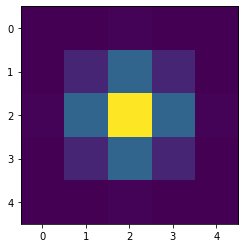

(2, 25)


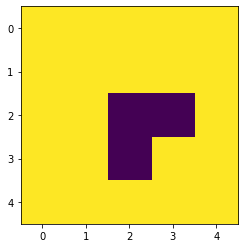

In [ ]:
# ToDo: delete
gauss = centered_gaussian(5, 5)
plt.imshow(gauss)
plt.show()
sorted_index = np.array(np.unravel_index(np.argsort(-gauss, axis=None), gauss.shape))
print(sorted_index.shape)

mask = np.ones_like(gauss)
mask[sorted_index[0,:3], sorted_index[1,:3]] = 0
plt.imshow(mask)

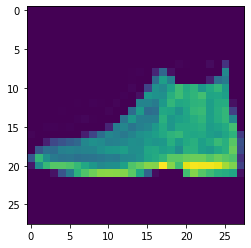

7
Removal: 1, accuracy: 0.5372


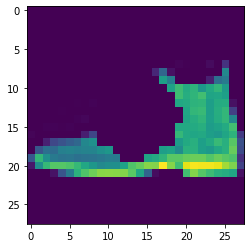

Removal: 2, accuracy: 0.4893


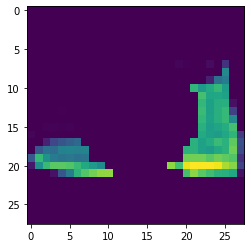

Removal: 3, accuracy: 0.4504


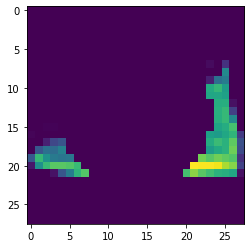

Removal: 4, accuracy: 0.4366


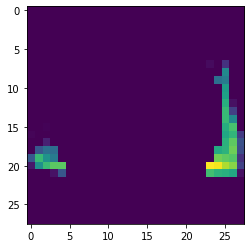

Removal: 5, accuracy: 0.2712


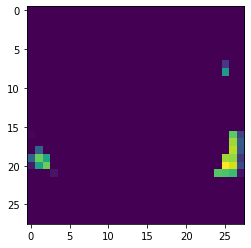

Removal: 6, accuracy: 0.1657


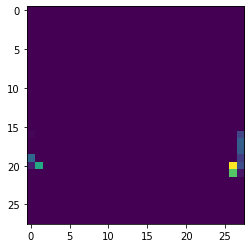

Removal: 7, accuracy: 0.1134


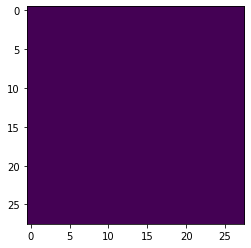

In [ ]:
import sys
sys.path.insert(0, '/content/drive/My Drive/2_xai/')
from xai_utils import centered_gaussian

explanations = [centered_gaussian(28,28)]*len(fmnist_test)

k = 100
removal_performances = remove_and_classify(lenet, fmnist_test, explanations, k) 
removal_performances.insert(0, fmnist_accuracy) # in place, adding the original accuracy in front for AUC

The remove and classify score is  0.454


Text(0.5, 0, 'Feature removal step (k=100)')

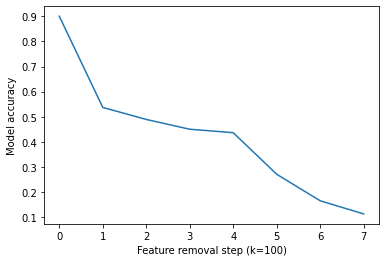

In [ ]:
# To get the remove-and-classify score, get the AUC of the plot and plot the removal performances for analysis
import matplotlib.pyplot as plt
rac_score = auc(range(len(removal_performances)), removal_performances)
rac_score_norm = rac_score / auc(range(len(removal_performances)), [fmnist_accuracy]*len(removal_performances))
print(f"The remove and classify score is {rac_score_norm: .3f}") 

plt.plot(removal_performances)
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step (k=100)')

In [ ]:
# Remove all defined variables from memory for the next exercise with garbage collection
%reset_selective -f "\b(?!remove_and_classify\b)\w+"

## **2. Explaining predictions with feature attribution** (25+5+10=40pts)
Recommended start: 25/11/2022

###2.1 CAM implementation (25pts)

In this exercise, you will implement the feature attribution explanation method [CAM by Zhou et al. (2016)](http://ieeexplore.ieee.org/document/7780688/) in PyTorch using an already pre-trained ResNet50 on the image classification task of CUB, which is often used in XAI. CUB is a bird classification dataset with 200 classes of bird species. 

Additionally, you will also implement the vanilla gradient explanation method as a baseline to compare to.

We provide the model and model evaluation code below. Visualize your results with the provided method. 


First, we load the dataset and the model. As this is not a standard PyTorch dataset, we added a bit of functionality to it for our experiments. Loading the dataset takes a bit (loading roughly 3 min).

In [ ]:
import sys
sys.path.insert(0, '/content/drive/My Drive/2_xai/')
from xai_utils import load_cub_test, model_accuracy, centered_gaussian


cub_test = load_cub_test()
num_classes = 200 # 200 Bird species in CUB dataset


  0%|          | 0/1150585339 [00:00<?, ?it/s]

#### Load pre-trained ResNet50 with changed architecture in the last layers (5pts)

Then, we load the model. It is a ResNet50 model that is pre-trained on the CUB dataset. 

**Important:** As mentioned during the lecture, there is an architectural change to the classic ResNet50 in the last layers in the provided model. Usually, a ResNet ends with a global average pooling layer before a dense layer, and then followed by a softmax. This is equivalent to changing the last layers to a 1x1 convolutional layer, global average pooling followed by softmax. With this architecture change, it is simpler to extract CAM. 

In [ ]:
import torch
from torchvision import transforms
from google.colab import drive
drive.mount('/content/drive')

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.insert(0, '/content/drive/My Drive/2_xai/')
from resnet50 import resnet50
resnet = resnet50(dataset_name='CUB',
                    pretrained=False,
                    num_classes=num_classes,
                    large_feature_map=False,
                    use_bn=True)
ckpt = torch.load("/content/drive/My Drive/2_xai/cam_cub_checkpoint.pth.tar") 
resnet.load_state_dict(ckpt["state_dict"])
resnet.to(device)
resnet.eval()

ModuleNotFoundError: ignored

In [ ]:
cub_accuracy = model_accuracy(resnet, cub_test)
assert cub_accuracy == 0.799
print(f'Accuracy on the test set: {cub_accuracy:.3f}')

Accuracy on the test set: 0.799


Below, we provide the functions to show an image of the dataset and to visualize the feature attribution explanation as a heatmap overlay. Examples on how to use are also provided.

In [ ]:
import sys
sys.path.insert(0, '/content/drive/My Drive/2_xai')
from xai_utils import show_sample, show_attribution_overlay

ModuleNotFoundError: ignored

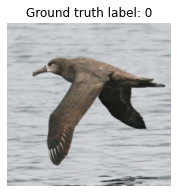

In [ ]:
# Example. Visualizing the first test image.
show_sample(dataset=cub_test, sample_idx=0)

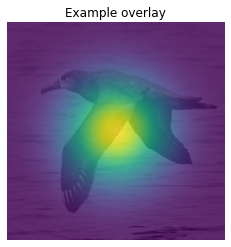

In [ ]:
# Example. Visualizing the gaussian baseline as an attribution explanation overlay.
show_attribution_overlay(dataset=cub_test, 
                         sample_idx=0,
                         attribution_map=centered_gaussian(224,224),
                         title='Example overlay')

**Your turn! Write a function to extract CAM from the model to explain a certain prediction.**

#### Extract CAM from the ResNet50 model

In [ ]:
def class_activation_map(model, dataset, sample_idx):
    """Gets the class activation map of the predicted class as a feature attribution explanation from the last convolutional layer of adapted ResNet model.
    Originally from Zhou et al. (2016)

    :param model: Adapted ResNet model in with 1x1 convolution
    :param dataset: dataset containing the instance to be explained 
    :param sample_idx: ID of the instance to be explained
    :returns: CAM of shape (224, 224) in case of CUB
    """
    # Tip: use the hook method to extract the activations of particular layers
    # Hook method below from https://discuss.pytorch.org/t/how-can-l-load-my-best-model-as-a-feature-extractor-evaluator/17254/6 
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    image, _ = dataset[sample_idx]
    image = image.to(device)
    image = image.unsqueeze(0) # to get the batch size dimension
    #### >>>> PUT YOUR SOLUTION HERE <<<< 
    
    #### >>>> END OF YOUR SOLUTION <<<<
    return cam

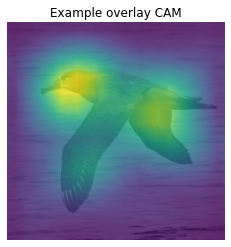

In [ ]:
cam = class_activation_map(resnet, cub_test, 0)

show_attribution_overlay(dataset=cub_test, 
                         sample_idx=0,
                         attribution_map=cam.squeeze(),
                         title='Example overlay CAM')

**Your turn again! Write a function to get the saliency map from [Simonyan et al. (2013)](http://arxiv.org/abs/1312.6034) as a local explanation.**

In [ ]:
def saliency(model, dataset, sample_idx):
    """Computes the saliency map of the predicted class as a feature attribution explanation. 
    From Simonyan et al. (2013)

    :param model: predictive model
    :param dataset: dataset containing the instance to be explained 
    :param sample_idx: ID of the instance to be explained
    :returns: saliency map of shape (224, 224) in case of CUB
    """
    # Tip: Look at the assumptions for RGB images in the paper.
    image, _ = dataset[sample_idx]
    image = image.to(device)
    image = image.unsqueeze(0) # to get the batch size dimension
    #### >>>> PUT YOUR SOLUTION HERE <<<< 
    
    #### >>>> END OF YOUR SOLUTION <<<<
    return saliency

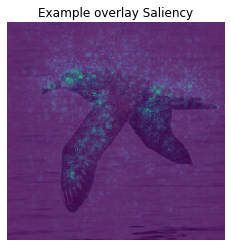

In [ ]:
saliency_attribution = saliency(resnet, cub_test, 0)

show_attribution_overlay(dataset=cub_test, 
                         sample_idx=0,
                         attribution_map=saliency_attribution,
                         title='Example overlay Saliency')

###2.2 Evaluate CAM (5pts)
Evaluate the methods using the remove-and-classify approach from exercise 1.3 of this homework. You may need to adapt the remove-and-classify function to the CUB dataset, because it is not a standard PyTorch dataset (If you need help with this, please contact the tutors since coding this correctly is not the point of this exercise). Report the scores. 

In [ ]:
from tqdm import tqdm

def get_explanations(explanation_function, model, dataset):
    """Computes the explanations for the whole dataset specified in dataset

    :param explanation_function: python function that takes arguments model, dataset, idx
    :param model: model to be explained
    :param dataset: dataset to be used to explain the model
    """
    explanations = []
    for idx in tqdm(range(len(dataset))):
        e = explanation_function(model, dataset, idx)
        explanations.append(e)
    return explanations

100%|██████████| 1000/1000 [00:13<00:00, 76.23it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 21/21 [08:06<00:00, 23.19s/it]

The remove and classify score is  0.206


Text(0.5, 0, 'Feature removal step (k=2500)')

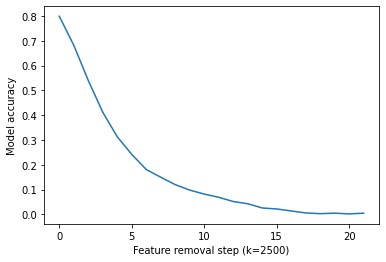

In [ ]:
import matplotlib.pyplot as plt
# Evaluation of CAM
# First, get the explanations
cam_explanations = get_explanations(class_activation_map, resnet, cub_test)

# then remove-and-classify, this takes roughly 5-10 min depending on the GPU you got assigned from Colab
k = 2500
cam_removal_performances = remove_and_classify(resnet, cub_test, cam_explanations, k)
cam_removal_performances.insert(0, cub_accuracy)

# Inspect the results
rac_score = auc(range(len(cam_removal_performances)), cam_removal_performances)
rac_score_norm = rac_score / auc(range(len(cam_removal_performances)), [cub_accuracy]*len(cam_removal_performances))
print(f"The remove and classify score is {rac_score_norm: .3f}") 

plt.plot(cam_removal_performances)
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step (k=2500)')

In [ ]:
# Free up RAM in colab
del globals()['cam_explanations']
del globals()['cam_removal_performances']
del globals()['cub_test']

Files already downloaded and verified


100%|██████████| 1000/1000 [00:30<00:00, 33.32it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 21/21 [07:59<00:00, 22.81s/it]


The remove and classify score is  0.135


Text(0.5, 0, 'Feature removal step (k=2500)')

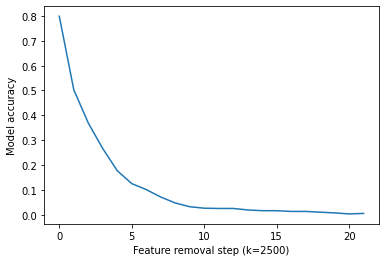

In [ ]:
# Evaluation of saliency
cub_test = load_cub_test()

# First, get the explanations
saliency_explanations = get_explanations(saliency, resnet, cub_test)

# then remove-and-classify
k = 2500
saliency_removal_performances = remove_and_classify(resnet, cub_test, saliency_explanations, k)
saliency_removal_performances.insert(0, cub_accuracy)

# Inspect the results
rac_score = auc(range(len(saliency_removal_performances)), saliency_removal_performances)
rac_score_norm = rac_score / auc(range(len(saliency_removal_performances)), [cub_accuracy]*len(saliency_removal_performances))
print(f"The remove and classify score is {rac_score_norm: .3f}") 

plt.plot(saliency_removal_performances)
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step (k=2500)')

In [ ]:
# Free up RAM in colab
del globals()['saliency_explanations']
del globals()['saliency_removal_performances']
del globals()['cub_test']

Files already downloaded and verified


100%|██████████| 21/21 [08:14<00:00, 23.57s/it]

The remove and classify score is  0.206


Text(0.5, 0, 'Feature removal step (k=100)')

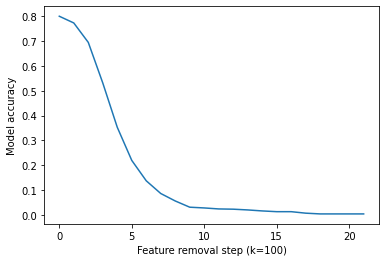

In [ ]:
# Evaluation of gaussian map baseline
cub_test = load_cub_test()
# First, get the explanations
baseline_explanations = [centered_gaussian(224,224)]*len(cub_test)
 
# then remove-and-classify
k = 2500
baseline_removal_performances = remove_and_classify(resnet, cub_test, baseline_explanations, k)
baseline_removal_performances.insert(0, cub_accuracy)

# Inspect the results
rac_score = auc(range(len(baseline_removal_performances)), baseline_removal_performances)
rac_score_norm = rac_score / auc(range(len(baseline_removal_performances)), [cub_accuracy]*len(baseline_removal_performances))
print(f"The remove and classify score is {rac_score_norm: .3f}") 

plt.plot(baseline_removal_performances)
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step (k=100)')

###2.3 Discussion (10 pts)
Briefly discuss your experimental results, both from visual inspection and the quantitative analysis. What does the evaluation say about CAM? What could be limitations of the remove-and-classify approach, too? Does it make sense to e.g. weight different parts of the AUC differently?

**WRITE YOUR ANSWER HERE**

In [ ]:
# Remove all defined variables from memory for the next exercise 
# from https://www.skillsugar.com/how-to-delete-variables-functions-from-memory-in-python
for element in dir():
    if element[0:2] != "__":
        del globals()[element]

del element

## **3. Explaining a model with feature visualization** (15+15=30pts)
Recommended start: 2/12/2022

###3.1 Feature visualization implementation (15pts)

In this exercise, you are going to implement feature visualization of features learned by neurons of a Googlenet model. For regularization we will use the total variation regularizer from [Mahendran and Vevaldi (2014)](http://arxiv.org/abs/1412.0035). Beware that their paper is not about feature visualization, but about image reconstruction.

Feature visualization is an optimization problem, where we are optimising an input image to maximize the activation of certain units in the inference model. These units can be single neurons, but also convolutional filters.

Try different starting images (e.g. random noise, any image) and feel free to play around with the resulting visualizations.


In [ ]:
# First, we load the inference model from the PyTorch Hub
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
torch.manual_seed(2022)

In [ ]:
# We do a small change to the forward method of the model, by adding a clamp.
# This keeps the input image in a valid range
import torch.nn as nn
class MyGoogLeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.googlenet = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)

    def forward(self, x):
        x = torch.clamp(x, 0, 1)
        x = self.googlenet(x)
        return x

In [ ]:
net = MyGoogLeNet().to(device)
net.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

MyGoogLeNet(
  (googlenet): GoogLeNet(
    (conv1): BasicConv2d(
      (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): BasicConv2d(
      (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv3): BasicConv2d(
      (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (inception3a): Inception(
      (branch1): BasicConv2d(
        (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (

In [ ]:
# We provide a simple visualization function of the image 
import matplotlib.pyplot as plt

def visualize(x):
    """Function to visualize x (detached from comp graph) with plt
    """
    x = x.cpu()
    x = x.permute(1,2,0) # switch dimensions to bring RGB to back
    plt.imshow(x)

In [ ]:
# We require the Hook method below to specify which network unit to target in the visualization.
# Code from https://discuss.pytorch.org/t/how-can-l-load-my-best-model-as-a-feature-extractor-evaluator/17254/6 

# In contrast to the hook method used to compute CAM in exercise 2, here we do not detach the activation because we require it for optimization
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output
    return hook

# YOUR TURN: try out different channels/layers/units/etc. You can take inspiration from 
# https://distill.pub/2017/feature-visualization/appendix/googlenet/4b.html#channel-4 
# a whole inception layer
net.googlenet.inception4a.register_forward_hook(get_activation('4a'))
# one convolutional layer of the inception layer
net.googlenet.inception4a.branch1.conv.register_forward_hook(get_activation('4a1conv'))
# the final layer
net.googlenet.fc.register_forward_hook(get_activation('fc'))

**Your turn! Take a look at the code below and complete it to optimize the input image for high activation of the unit.**

In [ ]:
from torch.optim import Adam

# start with random image
x = torch.rand((3,224,224), requires_grad=True, device=device) # We want to optimize x to maximize the activation 

optimizer = Adam([x], lr=0.01) # optimize the image
num_epochs = 500
x_prog = {} # To store the optimized images

for step in range(num_epochs):
    optimizer.zero_grad()

    # run the model on the input
    net(x.unsqueeze(0)) # unsqueeze to simulate the batch

    # get the activation of a unit
    neuron_activation = # PUT YOUR ANSWER HERE

    # log progress
    if step % 50 == 0:
        print(f'Mean activation in Step {step}: {torch.mean(neuron_activation): .3f}')
        x_prog[step] = torch.clamp(x,0,1).clone().detach()

    # define the loss 
    loss = # PUT YOUR ANSWER HERE

    # Backpropagate and optimization
    loss.backward()
    optimizer.step()

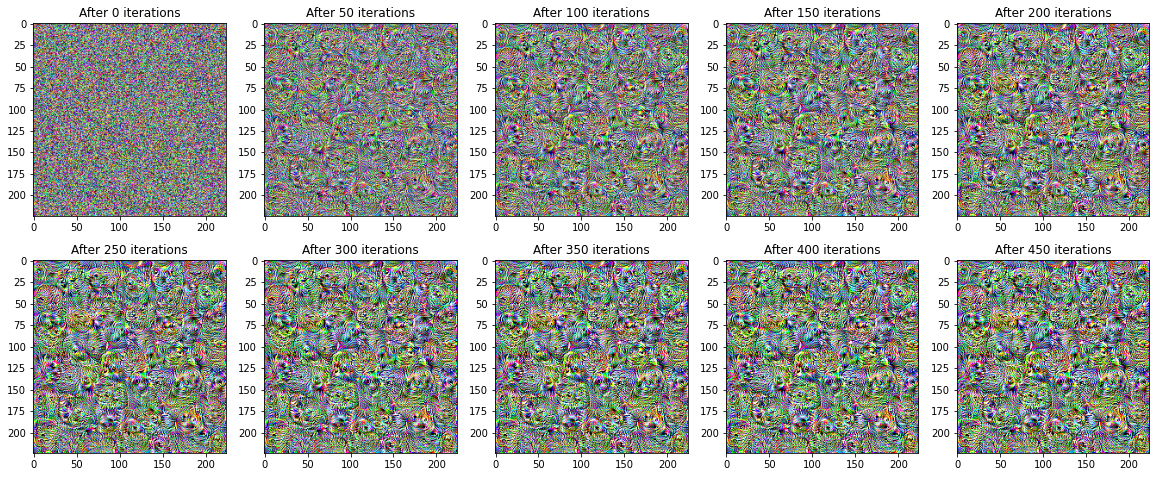

In [ ]:
# Visualize the progressions

plt.figure(figsize=(20,8))

for i, key in enumerate(x_prog.keys()):
    plt.subplot(2,5,i+1)
    visualize(x_prog[key])
    plt.title(f'After {key} iterations')

Let's add the total variation regularizer and see what happens. 

In [ ]:
# YOUR TURN! PUT YOUR ANSWER HERE
def total_variation_regularizer(x, beta):
    pass

In [ ]:
# Run another optimization
x = torch.rand((3,224,224), requires_grad=True, device=device) 

optimizer = Adam([x], lr=0.01) # optimize the image
num_epochs = 1000
x_prog_tv = {} # To store the optimized images

for step in range(num_epochs):
    optimizer.zero_grad()

    # run the model on the input
    net(x.unsqueeze(0)) # unsqueeze to simulate the batch

    # get the activation of a unit
    neuron_activation = # PUT YOUR ANSWER HERE (same as above)

    # log progress
    if step % 100 == 0:
        print(f'Mean activation in Step {step}: {torch.mean(neuron_activation): .3f}')
        x_prog_tv[step] = torch.clamp(x, 0, 1).clone().detach()

    # define the loss 
    loss = # PUT YOUR ANSWER HERE (with TV regularization)

    # Backpropagate and optimization
    loss.backward()
    optimizer.step()

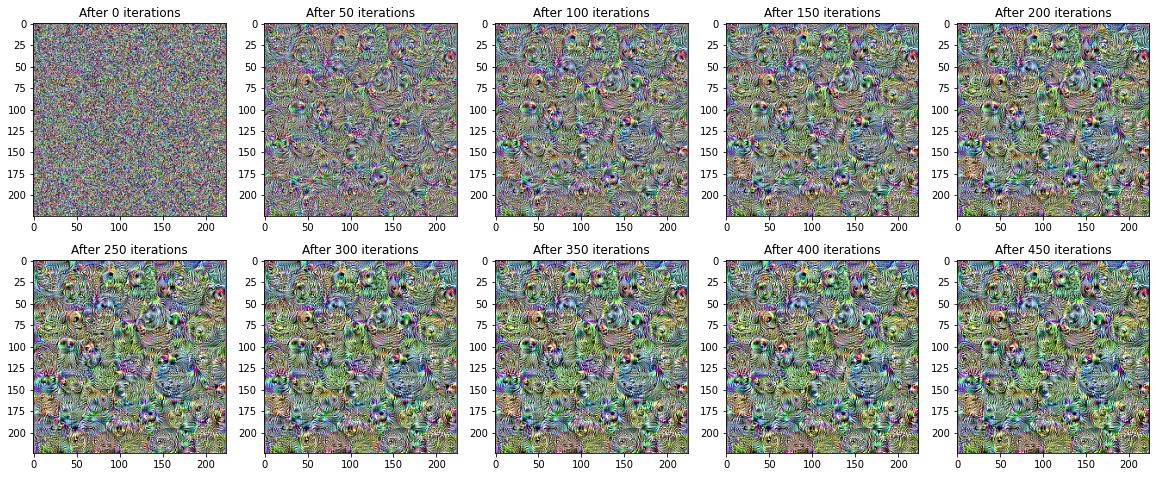

In [ ]:
# Visualize the progressions

plt.figure(figsize=(20,8))

for i, key in enumerate(x_prog_tv.keys()):
    plt.subplot(2,5,i+1)
    visualize(x_prog_tv[key])
    plt.title(f'After {key} iterations')

###3.2 Discussion (15pts)

Discuss your observations from the feature visualizations. 
- What is the effect of the total variation regularization? Does it make sense?

- What kind of insights do feature visualizations give into the model? How general are these insights? 

- Where could such explanations be used? 


**WRITE YOUR ANSWER HERE**

## **4. (Bonus) Short Paper Review** (10pts)

In this bonus task, your task is to write a short review for **one** of the following papers: 
- [THIS LOOKS LIKE IT RATHER THAN THAT: PROTOKNN FOR SIMILARITY-BASED CLASSIFIERS](https://openreview.net/forum?id=lh-HRYxuoRr). 
- [TAKE 5: INTERPRETABLE IMAGE CLASSIFICATION WITH A HANDFUL OF FEATURES](https://openreview.net/forum?id=9EcAsB7wgM)
- [ViT-CX: Causal Explanation of Vision Transformers](http://arxiv.org/abs/2211.03064)

Below is are a few questions to consider in a review as inspiration (Slightly adapted from [ICML'22 reviewer guide](https://drive.google.com/file/d/15hPTA64h31ShaoybLWeU3moZan7zVbr_/view))
- A concise summary of the paper
    - What problem is addressed in the paper?
    - Why does the problem matter?
    - What is the key to the solution? What is the main contribution?
    - Do the experiments sufficiently support the claims?
- A clear statement of strengths and weaknesses
    - What are the key contributions and why do they matter?
    - What aspects of the paper most need improvement?
- A comprehensive check of potential fundamental flaws in the paper
    - Are the assumptions and theories (mathematically) sound?
    - Are the experiments scientifically sound and valid?
    - Is the problem addressed trivial?


**WRITE YOUR ANSWER HERE**